# Regression Models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#importing the dataset
data = pd.read_excel('/content/drive/MyDrive/Abu Dhabi_temp_hourly.xlsx')


Mounted at /content/drive


FileNotFoundError: ignored


## EDA

In [ ]:
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22608 entries, 0 to 22607
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Place             22608 non-null  object 
 1   Date/time         22608 non-null  object 
 2   temp              22608 non-null  float64
 3   feelslike         22608 non-null  float64
 4   dew               22608 non-null  float64
 5   humidity          22608 non-null  float64
 6   precip            22601 non-null  float64
 7   precipprob        22608 non-null  int64  
 8   preciptype        277 non-null    object 
 9   snow              11241 non-null  float64
 10  snowdepth         1 non-null      float64
 11  windgust          13630 non-null  float64
 12  windspeed         22608 non-null  float64
 13  winddir           22608 non-null  float64
 14  sealevelpressure  22307 non-null  float64
 15  cloudcover        22608 non-null  float64
 16  visibility        22427 non-null  float6

In [ ]:
data.shape

(22608, 24)

There are 3 categorical features and luckily no missing value. Let's explore the data further.

In [ ]:
data.head(3)

,Place,Date/time,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Abu Dhabi,2021-01-01T00:00:00,19.9,19.9,16.8,82.25,0.0,0,NaN,NaN,...,1016.9,0.5,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"41216099999,41217099999,OMAD,OMAA"
1,Abu Dhabi,2021-01-01T01:00:00,19.8,19.8,15.9,78.38,0.0,0,NaN,NaN,...,1017.0,31.1,10.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"41216099999,41217099999,OMAD,OMAA"
2,Abu Dhabi,2021-01-01T02:00:00,19.9,19.9,15.9,77.75,0.0,0,NaN,NaN,...,1016.9,19.5,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"41216099999,41217099999,OMAD,OMAA"


In [ ]:
data.columns

Index(['Place', 'Date/time', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

In [ ]:
data.uvindex.value_counts()

0.0     12107
7.0      1513
9.0      1220
8.0      1104
1.0      1076
5.0      1011
3.0       992
6.0       967
10.0      964
2.0       928
4.0       713
Name: uvindex, dtype: int64

<Axes: >

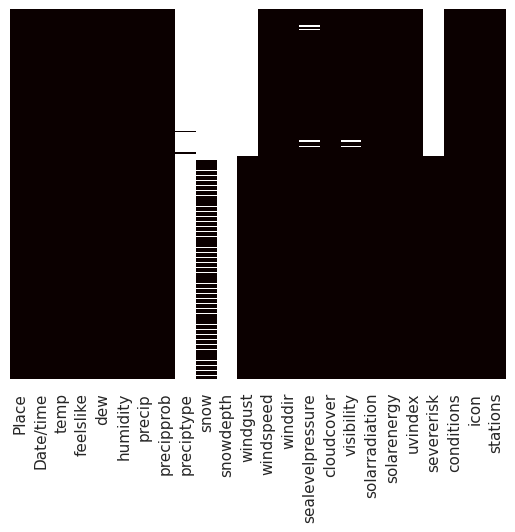

In [ ]:
#Visualize null value present in dataset
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='hot')

In [ ]:
data.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,22608.000000,22608.000000,22608.000000,22608.000000,22601.000000,22608.000000,11241.0,1.0,13630.000000,22608.000000,22608.000000,22307.000000,22608.000000,22427.000000,22595.000000,22595.000000,22595.000000,13616.000000
mean,29.272280,32.101933,18.175217,55.541970,0.003854,1.127919,0.0,0.0,20.362575,11.382059,212.331958,1007.950755,21.948554,9.408115,265.677588,0.956039,2.640407,16.807506
std,6.550969,9.571333,6.145322,19.402639,0.061412,10.560524,0.0,NaN,11.982311,6.576545,118.619703,7.708500,32.500594,1.542130,341.950071,1.231322,3.442116,15.800674
min,11.800000,11.800000,-7.700000,6.080000,0.000000,0.000000,0.0,0.0,0.700000,0.000000,0.000000,990.900000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,23.900000,23.900000,14.100000,41.417500,0.000000,0.000000,0.0,0.0,11.500000,6.100000,110.000000,1001.000000,0.000000,10.000000,0.000000,0.000000,0.000000,10.000000
50%,29.900000,30.800000,17.900000,57.630000,0.000000,0.000000,0.0,0.0,18.400000,10.000000,242.000000,1009.000000,1.500000,10.000000,23.900000,0.100000,0.000000,10.000000
75%,34.100000,40.100000,22.900000,70.090000,0.000000,0.000000,0.0,0.0,26.300000,15.400000,320.325000,1014.900000,30.300000,10.000000,560.150000,2.000000,6.000000,19.000000
max,47.000000,60.400000,31.800000,100.000000,3.600000,100.000000,0.0,0.0,144.000000,122.600000,360.000000,1025.300000,100.000000,24.100000,1079.500000,3.900000,10.000000,100.000000


In [ ]:
data=data.drop(['preciptype', 'snow', 'snowdepth', 'windgust','severerisk','stations','Place'], axis=1)

In [ ]:
#drop all rows has null value
data.isna().sum()


Date/time             0
temp                  0
feelslike             0
dew                   0
humidity              0
precip                7
precipprob            0
windspeed             0
winddir               0
sealevelpressure    301
cloudcover            0
visibility          181
solarradiation       13
solarenergy          13
uvindex              13
conditions            0
icon                  0
dtype: int64

<Axes: xlabel='sealevelpressure', ylabel='Density'>

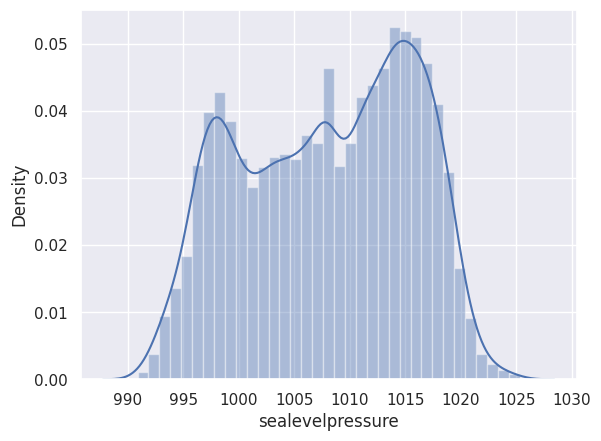

In [ ]:
data['sealevelpressure'].fillna(value=data['sealevelpressure'].mean(), inplace=True)
sns.distplot(data["sealevelpressure"])

<Axes: xlabel='solarradiation', ylabel='Density'>

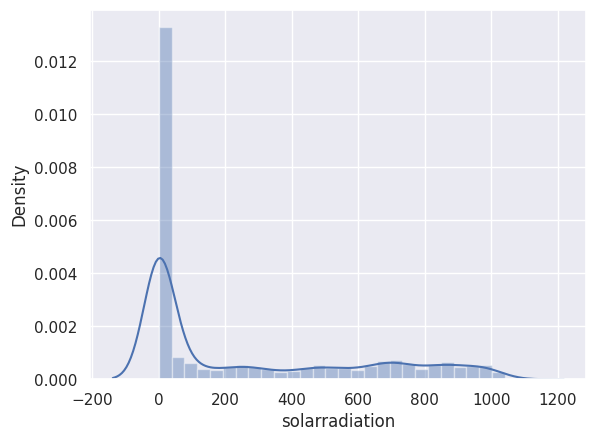

In [ ]:
data['solarradiation'].fillna(value=data['solarradiation'].mean(), inplace=True)
sns.distplot(data["solarradiation"])

<Axes: xlabel='solarenergy', ylabel='Density'>

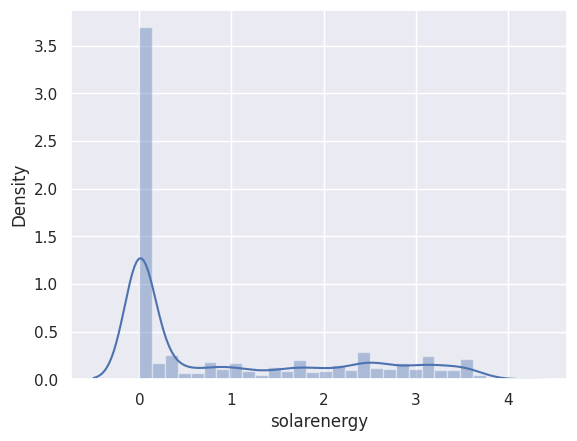

In [ ]:
data['solarenergy'].fillna(value=data['solarenergy'].mean(), inplace=True)
sns.distplot(data["solarenergy"])

<Axes: xlabel='visibility', ylabel='Density'>

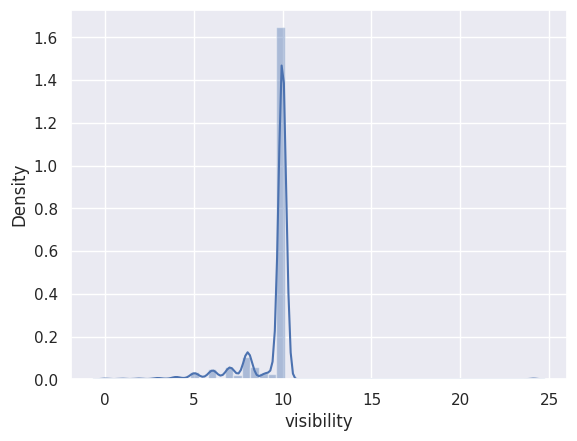

In [ ]:
data['visibility'].fillna(value=data['visibility'].mean(), inplace=True)
sns.distplot(data["visibility"])

<Axes: xlabel='precip', ylabel='Density'>

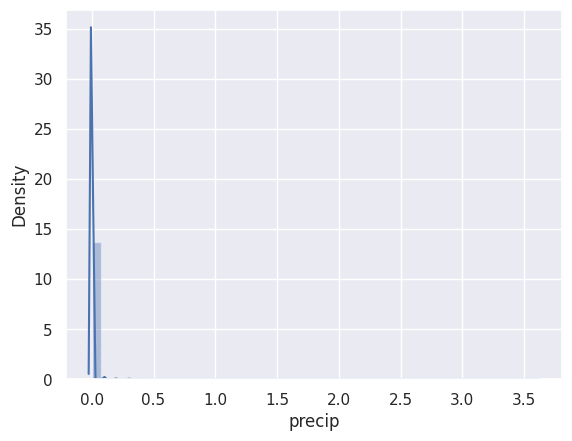

In [ ]:
data['precip'].fillna(value=data['precip'].mean(), inplace=True)
sns.distplot(data["precip"])

In [ ]:
#drop all rows has null value
data.isna().sum()


Date/time            0
temp                 0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex             13
conditions           0
icon                 0
dtype: int64

In [ ]:
data.shape

(22608, 17)

In [ ]:
#data.hist (bins=50, figsize=(20,15))

In [ ]:
data.uvindex.value_counts()

0.0     12107
7.0      1513
9.0      1220
8.0      1104
1.0      1076
5.0      1011
3.0       992
6.0       967
10.0      964
2.0       928
4.0       713
Name: uvindex, dtype: int64

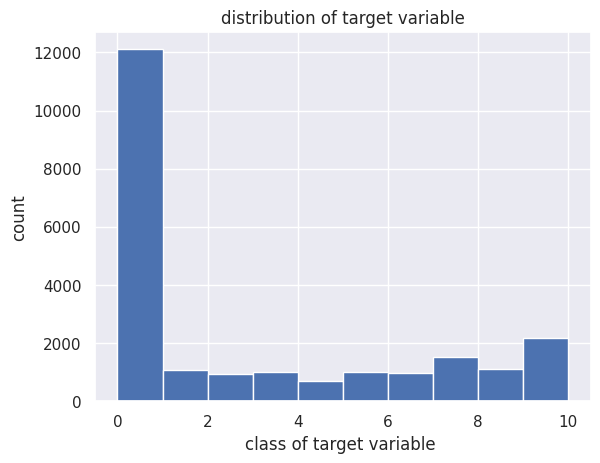

In [ ]:
# histogram of dependant variable
data['uvindex'].hist()
plt.xlabel("class of target variable ")
plt.ylabel("count")
plt.title("distribution of target variable")
plt.show()

In [ ]:
# change datatypes
data['uvindex'] = data['uvindex'].fillna(10).astype('category')
data['conditions']=data['conditions'].astype('category')
data['icon']=data['icon'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22608 entries, 0 to 22607
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Date/time         22608 non-null  object  
 1   temp              22608 non-null  float64 
 2   feelslike         22608 non-null  float64 
 3   dew               22608 non-null  float64 
 4   humidity          22608 non-null  float64 
 5   precip            22608 non-null  float64 
 6   precipprob        22608 non-null  int64   
 7   windspeed         22608 non-null  float64 
 8   winddir           22608 non-null  float64 
 9   sealevelpressure  22608 non-null  float64 
 10  cloudcover        22608 non-null  float64 
 11  visibility        22608 non-null  float64 
 12  solarradiation    22608 non-null  float64 
 13  solarenergy       22608 non-null  float64 
 14  uvindex           22608 non-null  category
 15  conditions        22608 non-null  category
 16  icon              2260

<Axes: >

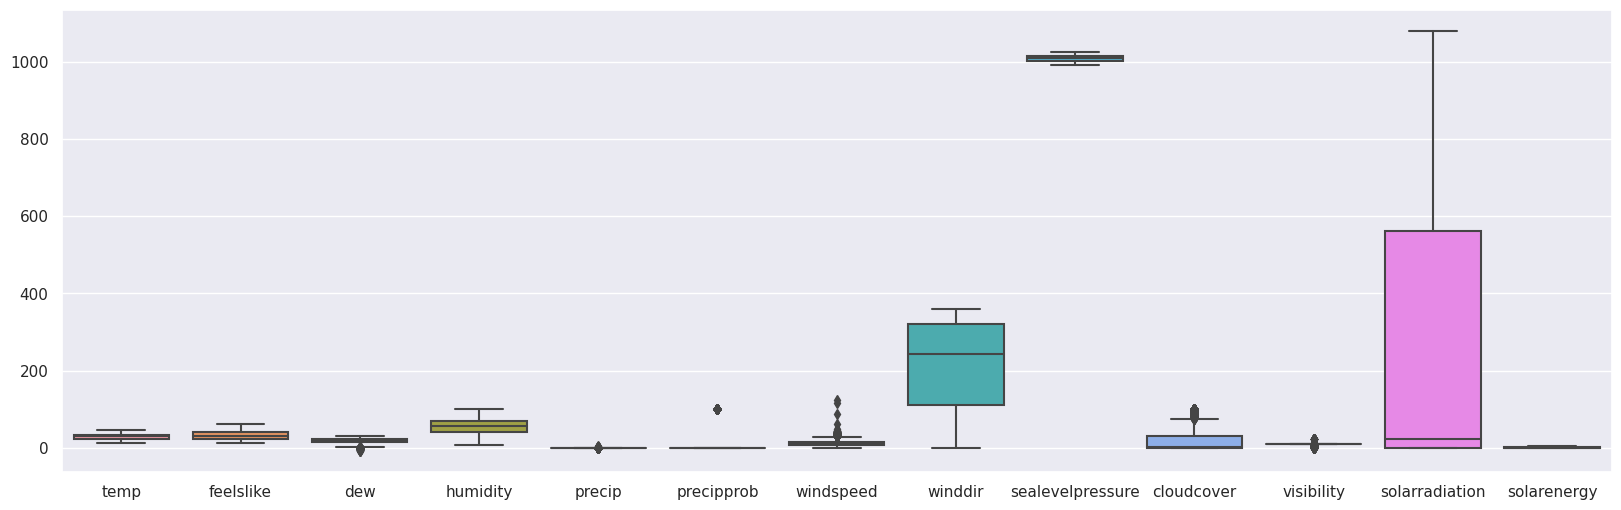

In [ ]:
#checking outliers
a4_dims = (20 , 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, data=data)

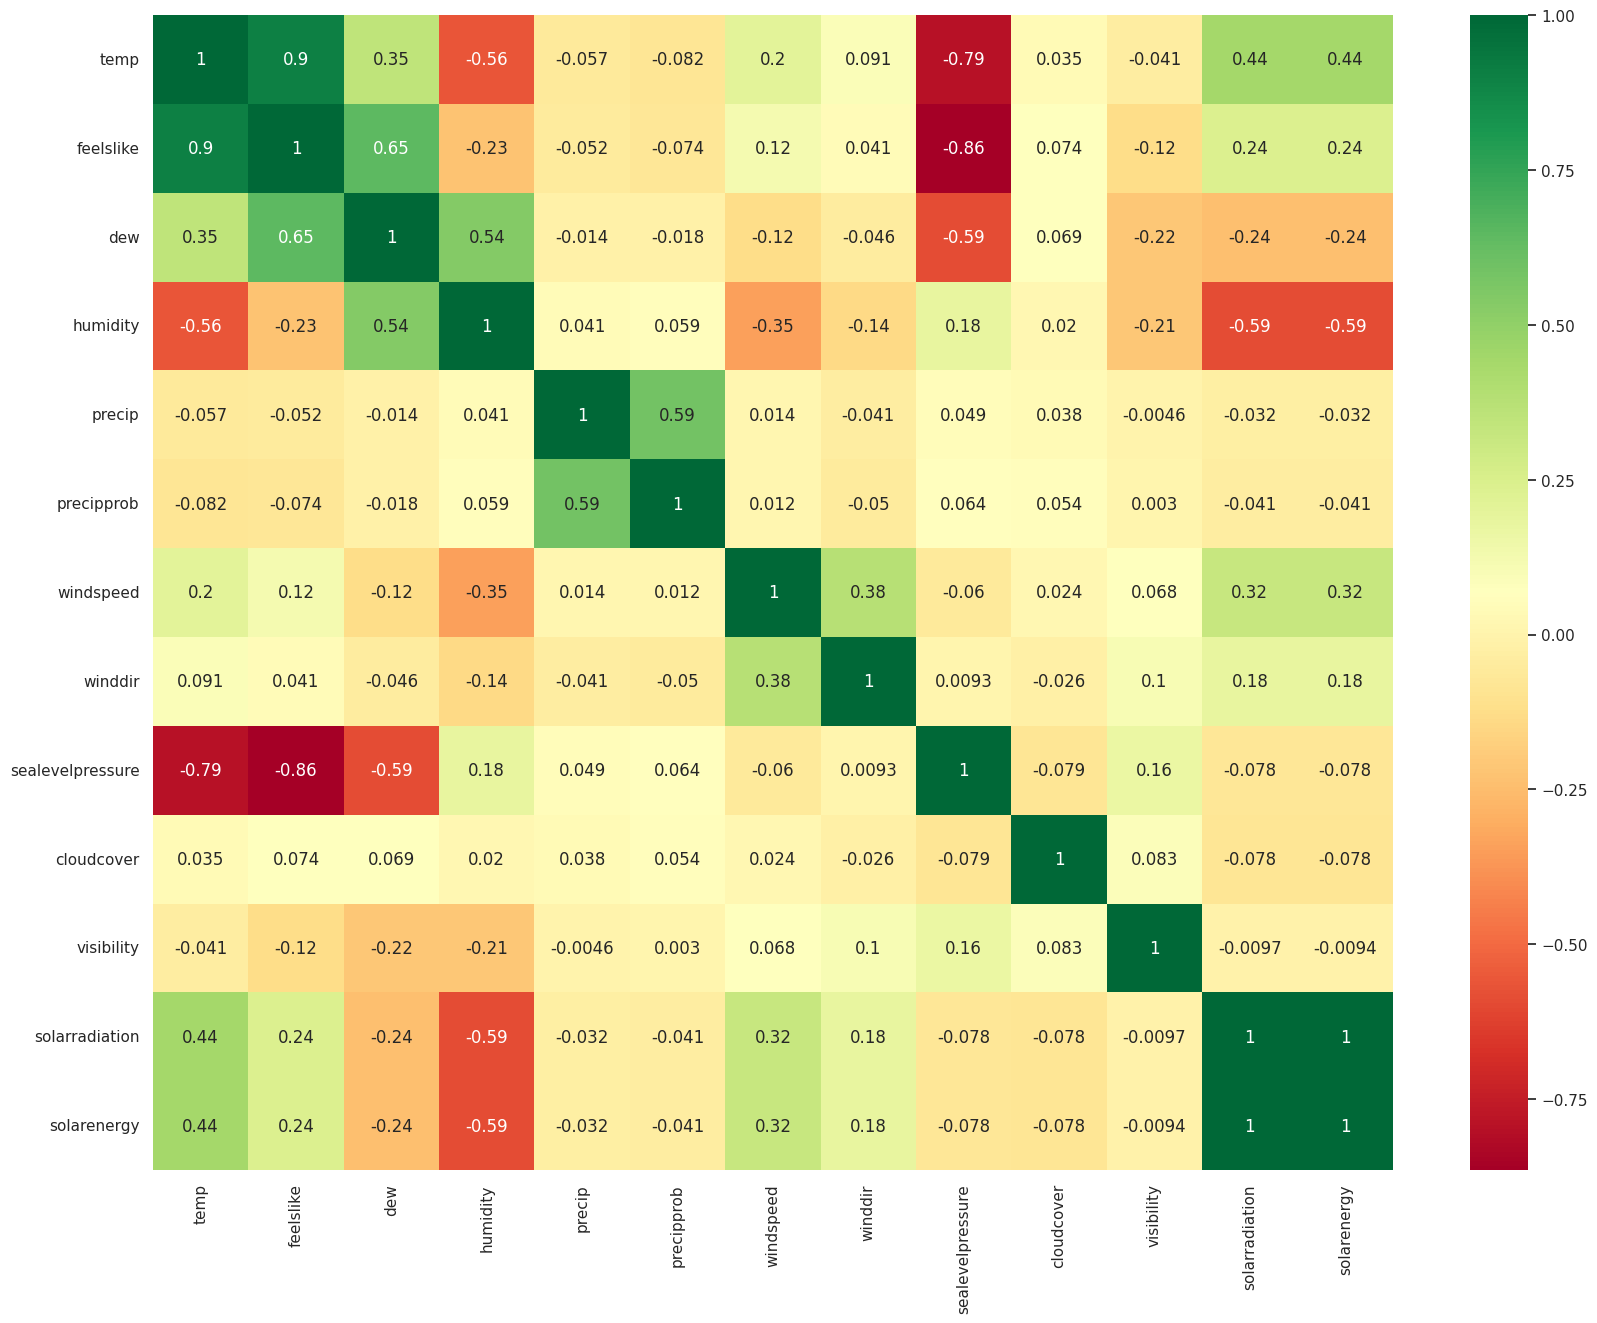

In [ ]:
#Lets get Correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [ ]:
data.columns

Index(['Date/time', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'icon'],
      dtype='object')

In [ ]:
data.uvindex.value_counts()

0.0     12107
7.0      1513
9.0      1220
8.0      1104
1.0      1076
5.0      1011
3.0       992
10.0      977
6.0       967
2.0       928
4.0       713
Name: uvindex, dtype: int64

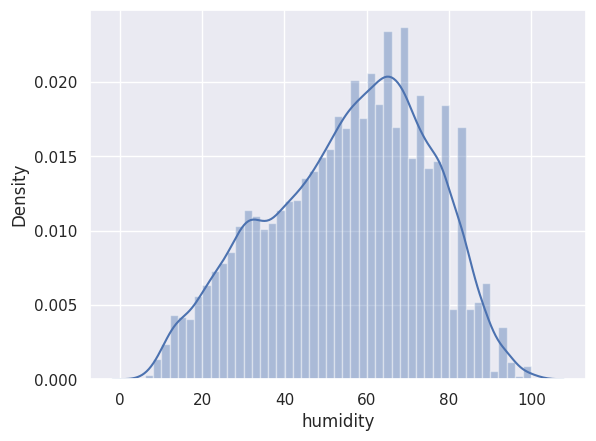

In [ ]:
sns.distplot(data['humidity']);

In [ ]:
data.solarradiation.value_counts()

0.0       10259
1.0         157
5.0          62
2.0          49
3.0          43
          ...  
415.8         1
476.1         1
685.3         1
475.9         1
1014.8        1
Name: solarradiation, Length: 3675, dtype: int64

In [ ]:
#sns.boxplot(y="temp", x="humidity", data=data);

In [ ]:
#data.year=data.year.apply(str)
#sns.boxplot(x="Date/time", y="uvindex", data=data1);

# Seasonality


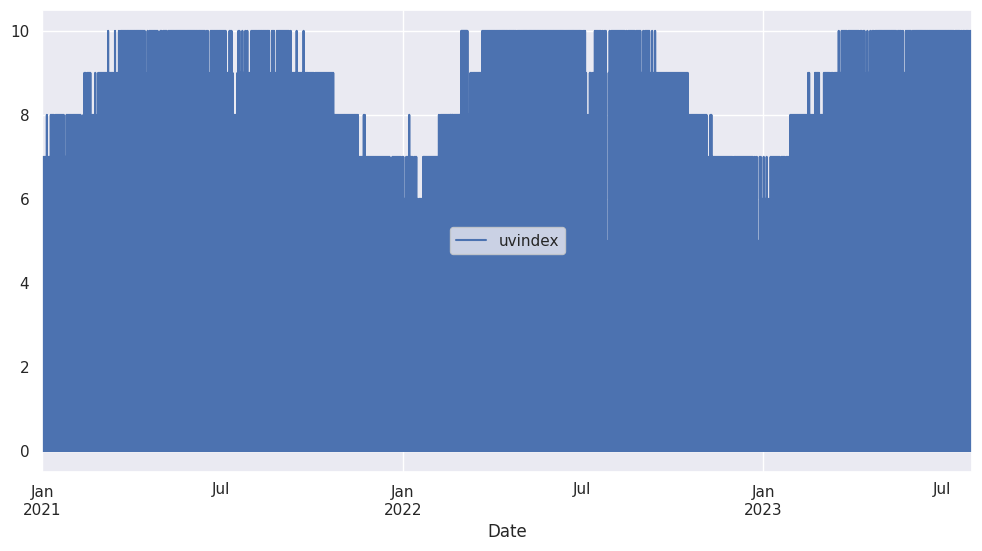

In [ ]:
df=data.copy()

df['Date/time'] = pd.to_datetime(df['Date/time'])
df['uvindex'] = df['uvindex'].fillna(10).astype(int)
df['Date'] = pd.to_datetime(data['Date/time']) # convert date column to DateTime
ax = df.plot(x='Date', y='uvindex', figsize=(12,6))

In [ ]:
def set_date_index(input_df, col_name='Date'):
    """Given a pandas df, parse and set date column to index.
        col_name will be removed and set as datetime index.

    Args:
        input_df (pandas dataframe): Original pandas dataframe
        col_name (string): Name of date column

    Returns:
        pandas dataframe: modified and sorted dataframe
    """
    # Copy df to prevent changing original
    modified_df = input_df.copy()

    # Infer datetime from col
    modified_df[col_name] = pd.to_datetime(modified_df[col_name])

    # Sort and set index
    modified_df.sort_values(col_name, inplace=True)
    modified_df.set_index(col_name, inplace=True)

    return modified_df

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Abu Dhabi_temp_hourly.xlsx")
#drop all rows has null value



df['uvindex'] = df['uvindex'].fillna(13).astype(int)
# Choose only necessary columns
df = df[['Date/time', 'uvindex']]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22608 entries, 0 to 22607
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date/time  22608 non-null  object
 1   uvindex    22608 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.4+ KB


In [ ]:

df.info()
# Normalize Metric
df['uvindex'] = \
    df['uvindex'] \
        / pd.to_datetime(df['Date/time']).dt.day

# Set date index
df = set_date_index(df, 'Date/time') # custom helper function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22608 entries, 0 to 22607
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date/time  22608 non-null  object
 1   uvindex    22608 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.4+ KB


In [ ]:
def combine_seasonal_cols(input_df, seasonal_model_results):
    """Adds inplace new seasonal cols to df given seasonal results

    Args:
        input_df (pandas dataframe)
        seasonal_model_results (statsmodels DecomposeResult object)
    """
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend

In [ ]:
# Seasonal decompose

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(df, period=24)
#sd = seasonal_decompose(df)
combine_seasonal_cols(df, sd) # custom helper function

In [ ]:
def mround(x, m=5):
    '''Helper method for multiple round'''
    return int(m * round(float(x)/m))


In [ ]:
def plot_components(df):
    """Plot data for initial visualization, ultimately visualized in Power BI

    Args:
        df (pandas dataframe)
    """
    df_axis = df.fillna(0)
    ymin = mround(np.min([df_axis.observed, df_axis.trend, df_axis.seasonal, df_axis.residual]),3)
    ymax = mround(np.max([df_axis.observed, df_axis.trend, df_axis.seasonal, df_axis.residual]),3)
    ymin -= 3
    ymax += 3

    plt.figure(figsize=(20,20))

    plt.subplot(4,1,1)
    plt.title("Original Data")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.observed)

    plt.subplot(4,1,2)
    plt.title("Trend")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.trend)

    plt.subplot(4,1,3)
    plt.title("Seasonal")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.seasonal)

    plt.subplot(4,1,4)
    plt.title("Residual")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.residual)

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

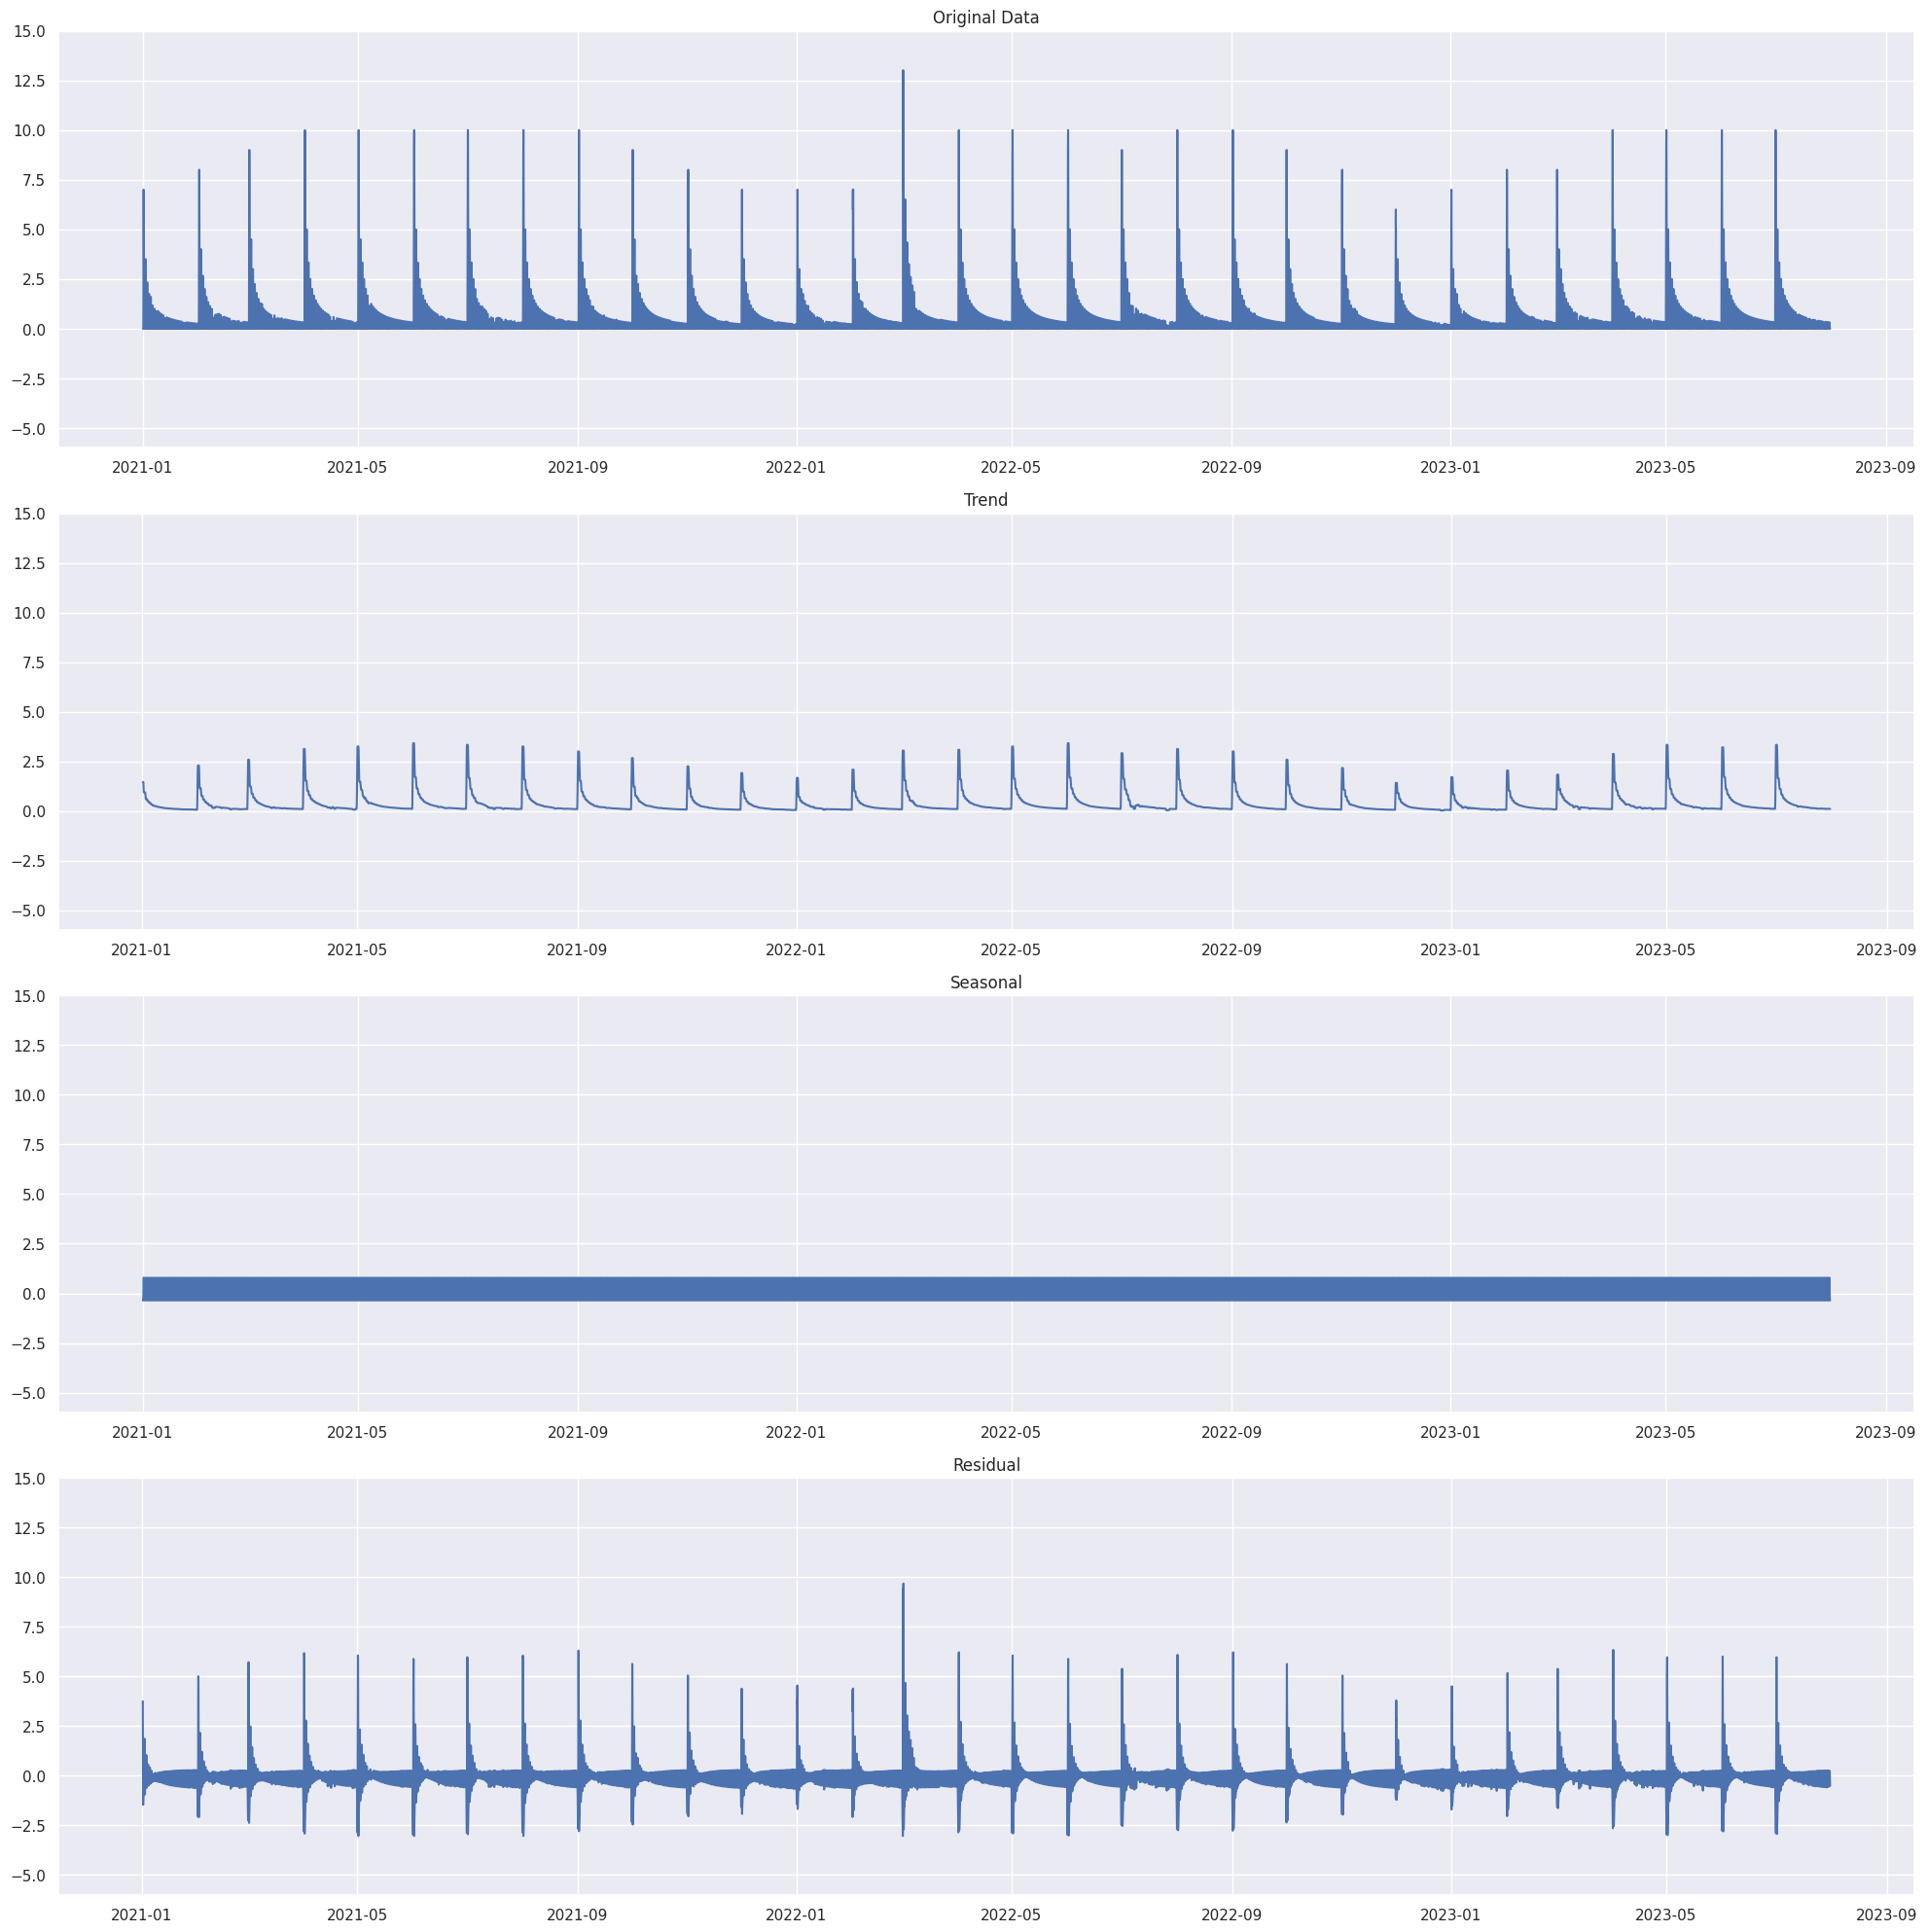

In [ ]:
plot_components(df)


## Preparing data for ML Regression models

In [ ]:
#drop all rows has null value
#data1= data.dropna()
data.isna().sum()

Date/time           0
temp                0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
icon                0
dtype: int64

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.shape

(22608, 17)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column conditions
data['conditions']= label_encoder.fit_transform(data['conditions'])
#data['preciptype']= label_encoder.fit_transform(data['preciptype'])
data['icon']= label_encoder.fit_transform(data['icon'])
data['conditions'].unique()

array([0, 2, 1, 5, 3, 4])

In [ ]:
data.columns

Index(['Date/time', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'icon'],
      dtype='object')

**We will seperate the target dependent and independent variable**

In [ ]:
X=data.drop(['Date/time','uvindex'], axis=1)
y=data['uvindex']

# Without SMOTE

In [ ]:
from sklearn.preprocessing import StandardScaler
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**ML Regression Models**

In [ ]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

In [ ]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor(),
    'Ridge' : Ridge(),
    'Lasso': LassoCV(cv = 5)
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

**Deep Neural Network**

In [ ]:
!pip install tensorflow

In [ ]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
127/127 [==============================] - 3s 11ms/step - loss: 2.9889 - val_loss: 0.1655
Epoch 2/150
127/127 [==============================] - 1s 10ms/step - loss: 0.6923 - val_loss: 0.1301
Epoch 3/150
127/127 [==============================] - 1s 9ms/step - loss: 0.6141 - val_loss: 0.2318
Epoch 4/150
127/127 [==============================] - 1s 9ms/step - loss: 0.5810 - val_loss: 0.3455
Epoch 5/150
127/127 [==============================] - 1s 9ms/step - loss: 0.5463 - val_loss: 0.1329
Epoch 6/150
127/127 [==============================] - 1s 9ms/step - loss: 0.4796 - val_loss: 0.1156
Epoch 7/150
127/127 [==============================] - 1s 9ms/step - loss: 0.4748 - val_loss: 0.1213
Epoch 8/150
127/127 [==============================] - 1s 8ms/step - loss: 0.4396 - val_loss: 0.2258
Epoch 9/150
127/127 [==============================] - 2s 14ms/step - loss: 0.4118 - val_loss: 0.2463
Epoch 10/150
127/127 [==============================] - 2s 15ms/step - loss: 0.3988 - va

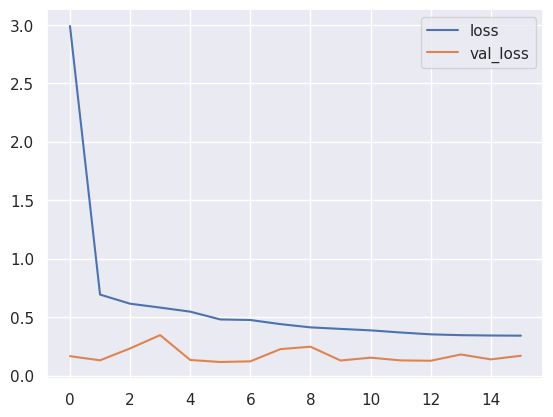

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [ ]:
dnn_pred = model.predict(X_test)

212/212 [==============================] - 1s 2ms/step


## Results table

In [ ]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.161,0.090,0.993
Decision Tree,0.004,0.017,0.999
Random Forest,0.009,0.010,0.999
Support Vector Machines,0.480,0.837,0.930
K-nearest Neighbors,0.284,0.419,0.965
XGBoost,0.005,0.004,1.000
Ridge,0.161,0.090,0.993
Lasso,0.155,0.090,0.993
Deep Neural Network,0.250,0.147,0.988


In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.005000,0.004000,1.000000
Decision Tree,0.004000,0.017000,0.999000
Random Forest,0.009000,0.010000,0.999000
Linear Regression,0.161000,0.090000,0.993000
Ridge,0.161000,0.090000,0.993000
Lasso,0.155000,0.090000,0.993000
Deep Neural Network,0.250000,0.147000,0.988000
K-nearest Neighbors,0.284000,0.419000,0.965000
Support Vector Machines,0.480000,0.837000,0.930000


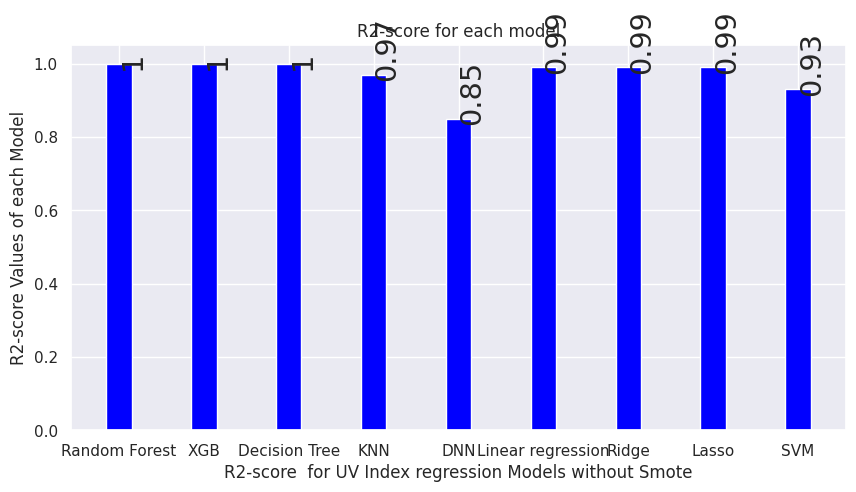

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],rotation='vertical',fontsize='xx-large')

# creating the dataset
data = {'Random Forest':1 , 'XGB':1, 'Decision Tree':1, 'KNN':0.97, 'DNN': 0.85,'Linear regression' : 0.99, 'Ridge':0.99 , 'Lasso': 0.99, 'SVM':0.93 }
Model = list(data.keys())
accu_values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Model, accu_values, color ='blue',width = 0.3)

# calling the function to add value labels
addlabels(Model, accu_values)
plt.xlabel("R2-score  for UV Index regression Models without Smote")
plt.ylabel("R2-score Values of each Model")
plt.title("R2-score for each model")
plt.show()

## Conclusion:

* Except Support Vector Machines model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, Decision Tree, Random Forest and XGBoost Regression algorithms have shown best results.

# WITH SMOTE

In [ ]:
data1=data.copy()

In [ ]:
#data1['uvindex'] = data1['uvindex'].replace([1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0], 1.0)

In [ ]:
data1.columns

Index(['Date/time', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'icon'],
      dtype='object')

**We will seperate the target dependent and independent variable**

In [ ]:
X=data1.drop(['Date/time','uvindex'], axis=1)
y=data1['uvindex']

**See the count of imbalance classes**

Class=10, n=977 (4.321%)


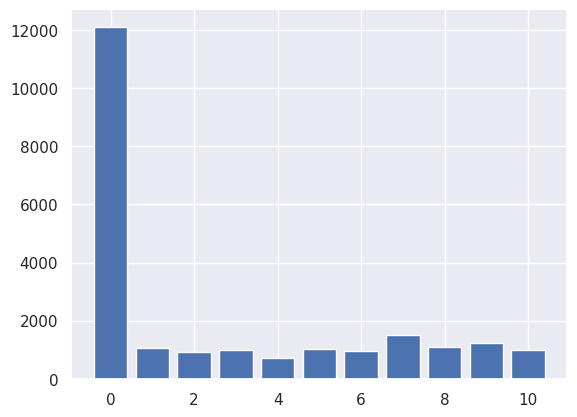

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**See the count after applying SMOTE algorithm to make all the classes balanced**

Class=0, n=12107 (9.091%)
Class=2, n=12107 (9.091%)
Class=4, n=12107 (9.091%)
Class=6, n=12107 (9.091%)
Class=7, n=12107 (9.091%)
Class=3, n=12107 (9.091%)
Class=1, n=12107 (9.091%)
Class=5, n=12107 (9.091%)
Class=8, n=12107 (9.091%)
Class=9, n=12107 (9.091%)
Class=10, n=12107 (9.091%)


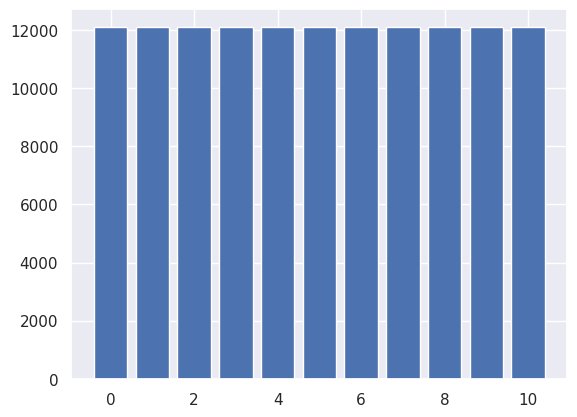

In [ ]:
# transform the dataset
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y_res)
for k,v in counter.items():
 per = v / len(y_res) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:

from sklearn.preprocessing import StandardScaler
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.30)

# Standardizing the data
#cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


**ML Regression models**

In [ ]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

In [ ]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor(),
    'Ridge' : Ridge(),
    'Lasso': LassoCV(cv = 5)
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

### **Deep Neural Network**

In [ ]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
746/746 [==============================] - 10s 11ms/step - loss: 1.7301 - val_loss: 0.1552
Epoch 2/150
746/746 [==============================] - 6s 9ms/step - loss: 0.7717 - val_loss: 0.2609
Epoch 3/150
746/746 [==============================] - 9s 12ms/step - loss: 0.6756 - val_loss: 0.1827
Epoch 4/150
746/746 [==============================] - 6s 9ms/step - loss: 0.6163 - val_loss: 0.2190
Epoch 5/150
746/746 [==============================] - 9s 12ms/step - loss: 0.5710 - val_loss: 0.1591
Epoch 6/150
746/746 [==============================] - 6s 8ms/step - loss: 0.5368 - val_loss: 0.1612
Epoch 7/150
746/746 [==============================] - 9s 12ms/step - loss: 0.5048 - val_loss: 0.2720
Epoch 8/150
746/746 [==============================] - 6s 8ms/step - loss: 0.4806 - val_loss: 0.1875
Epoch 9/150
746/746 [==============================] - 8s 11ms/step - loss: 0.4613 - val_loss: 0.2197
Epoch 10/150
746/746 [==============================] - 7s 9ms/step - loss: 0.4434 - 

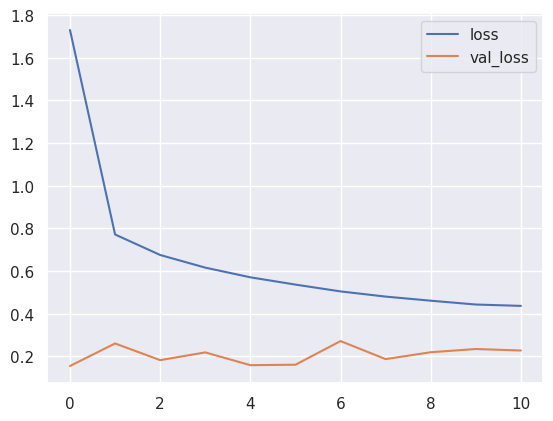

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [ ]:
dnn_pred = model.predict(X_test)

1249/1249 [==============================] - 3s 2ms/step


## Results table

In [ ]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.237,0.130,0.987
Decision Tree,0.001,0.002,1.000
Random Forest,0.001,0.002,1.000
Support Vector Machines,0.187,0.176,0.982
K-nearest Neighbors,0.038,0.055,0.995
XGBoost,0.002,0.002,1.000
Ridge,0.237,0.130,0.987
Lasso,0.239,0.130,0.987
Deep Neural Network,0.334,0.230,0.977


Let's have a look at methods performing best as they have R2-score close to 1.

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
Decision Tree,0.001000,0.002000,1.000000
Random Forest,0.001000,0.002000,1.000000
XGBoost,0.002000,0.002000,1.000000
K-nearest Neighbors,0.038000,0.055000,0.995000
Linear Regression,0.237000,0.130000,0.987000
Ridge,0.237000,0.130000,0.987000
Lasso,0.239000,0.130000,0.987000
Support Vector Machines,0.187000,0.176000,0.982000
Deep Neural Network,0.334000,0.230000,0.977000


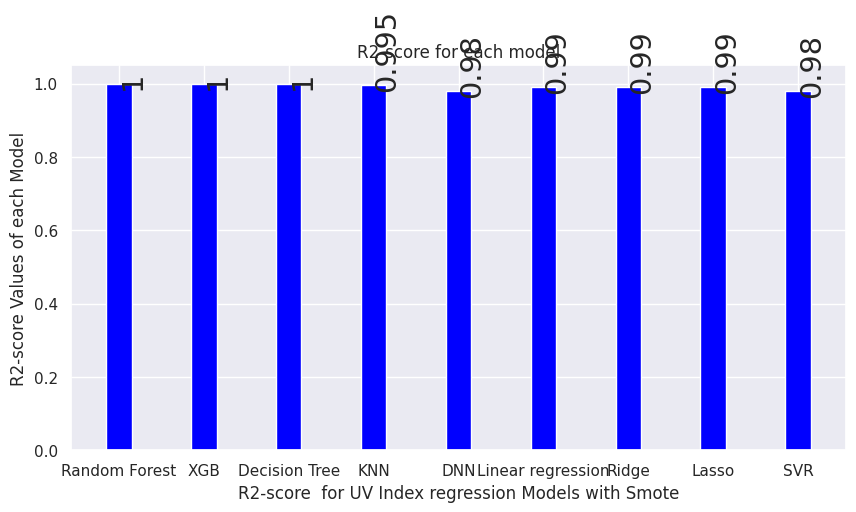

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],rotation='vertical',fontsize='xx-large')

# creating the dataset
data = {'Random Forest':1 , 'XGB':1, 'Decision Tree': 1,'KNN':0.995, 'DNN': 0.98,'Linear regression' : 0.99, 'Ridge':0.99 , 'Lasso': 0.99, 'SVR' :0.98}
Model = list(data.keys())
accu_values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Model, accu_values, color ='blue',width = 0.3)

# calling the function to add value labels
addlabels(Model, accu_values)
plt.xlabel("R2-score  for UV Index regression Models with Smote")
plt.ylabel("R2-score Values of each Model")
plt.title("R2-score for each model")
plt.show()

## Conclusion:

* Except Support Vector Machines model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, Decision Tree, Random Forest and XGBoost Regression algorithms have shown best results.